#                                           SPEECH TO TEXT ML MODEL


In [1]:
!pip install wavio


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
print("Enter the expected time of recording")
t=int(input())

Enter the expected time of recording


 5


In [44]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
 
# Sampling frequency
freq = 44100

# Recording duration
duration =t
 
# Start recorder with the given values of duration and sample frequency
recordingaudio = sd.rec(int(duration * freq),
                   samplerate=freq, channels=2)
 
# Record audio for the given number of seconds
sd.wait() 
# Convert the NumPy array to audio file
wv.write("audio1.wav", recordingaudio, freq, sampwidth=2)

In [45]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

In [46]:
audio_file = 'audio1.wav'

In [47]:
Audio(audio_file)

In [48]:
import librosa
import matplotlib.pyplot as plt

In [49]:
scale, sr = librosa.load(audio_file)
print(sr)
FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(S_scale) ** 2

22050


In [50]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

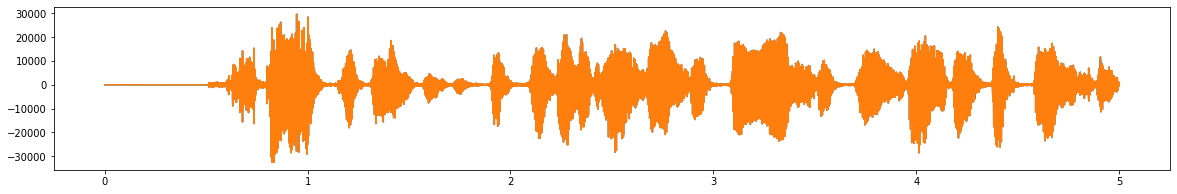

In [51]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
rate, data = wavfile.read("audio1.wav")
duration = len(data)/rate
time = np.arange(0,duration,1/rate) 
fig,ax=plt.subplots(figsize=(20,3))
ax.plot(time,data)

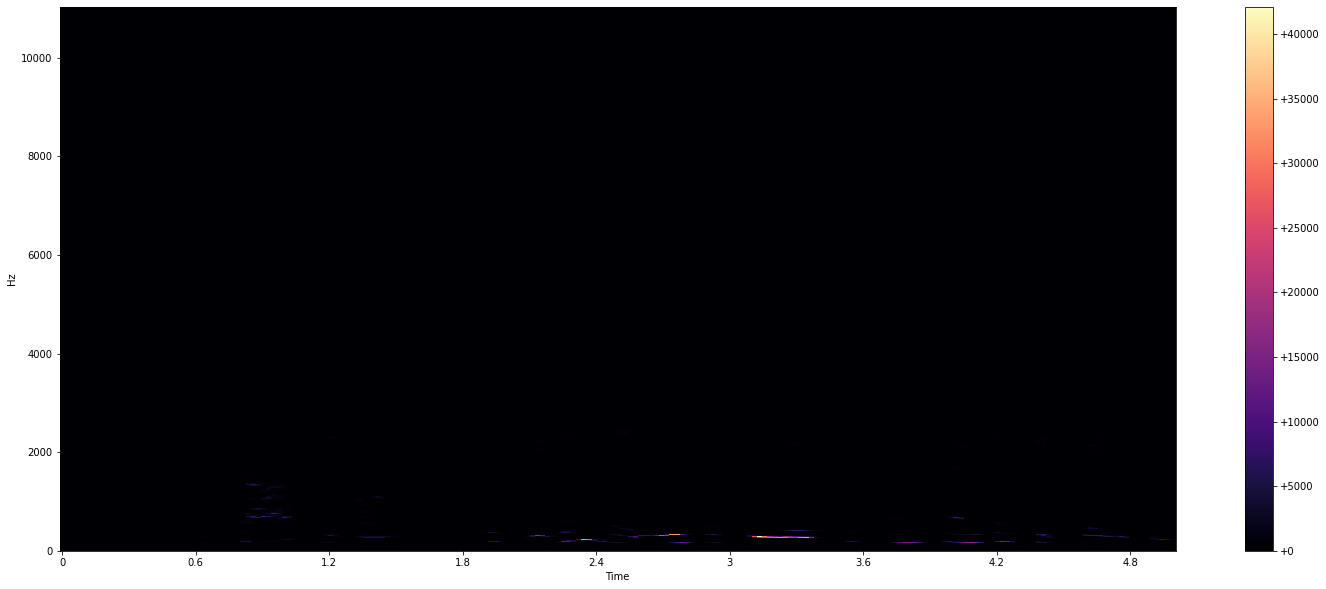

In [52]:
# Plotting a graph in linear scale
plot_spectrogram(Y_scale, sr, HOP_SIZE)

LOG-AMPLITUDE SPECTROGRAM

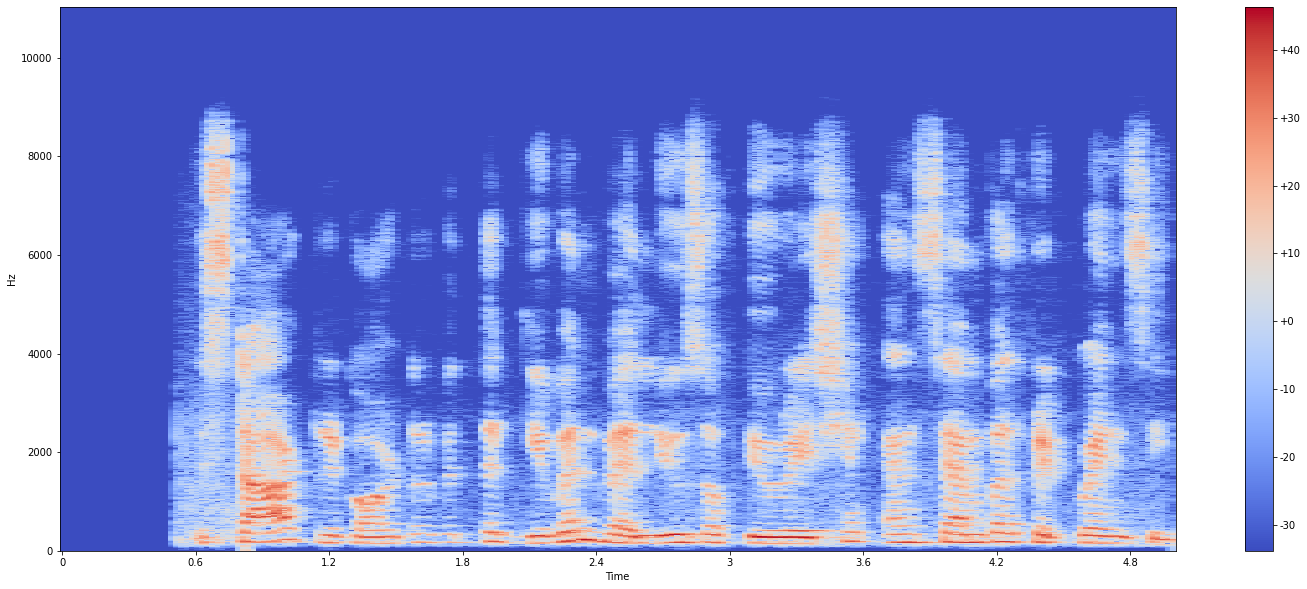

In [53]:
# Plotting a graph in log scale
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

LOG FREQUENCY SPECTROGRAM

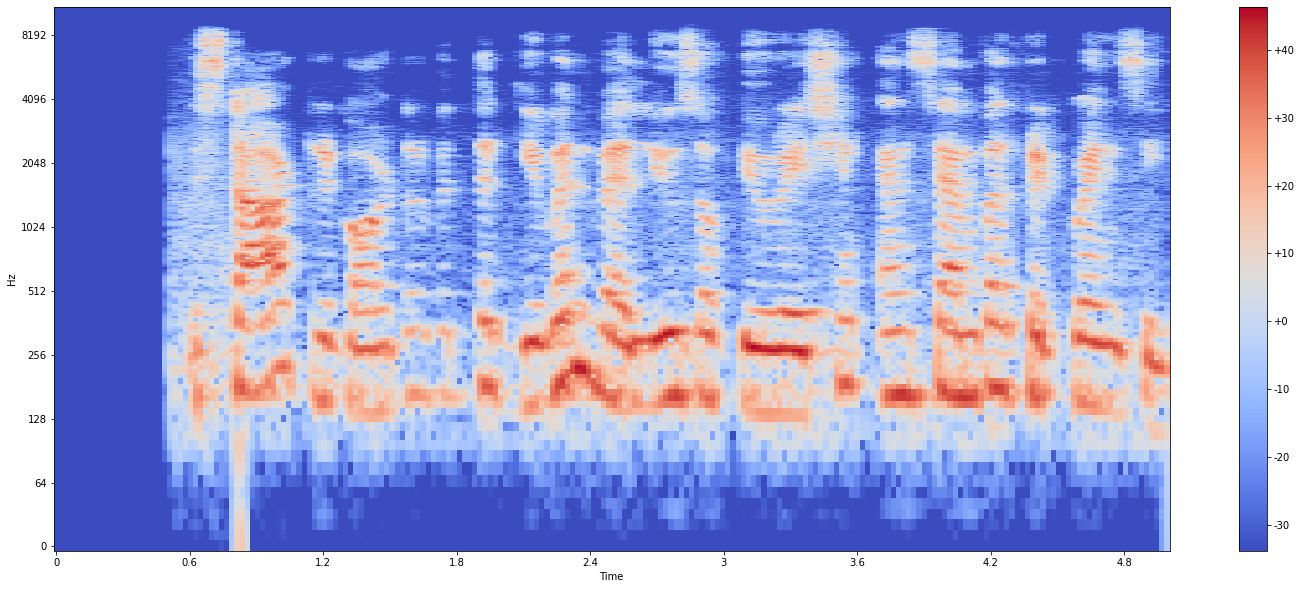

In [54]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [55]:
data=wavfile.read(audio_file)
framerate=data[0]
sounddata=data[1]
time=np.arange(0,len(sounddata))/framerate
print(framerate)
print('Total time:', len(sounddata)/framerate)

44100
Total time: 5.0


NOISE CREATION AND REMOVAL

In [56]:
import librosa
signal, sr = librosa.load(audio_file)

In [57]:
RMS=np.sqrt(np.mean(signal**2))
noise=np.random.normal(0, RMS, signal.shape[0])
signal_noise = signal+noise

In [58]:
Audio(audio_file)

In [59]:
wv.write("audionoise.wav", signal_noise, 24000, sampwidth=4)
filename="audionoise.wav"

C:\Users\KARAN GANGWAR\lib\site-packages\wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000000004656613, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


In [60]:
Audio(filename)

In [61]:
!pip install noisereduce


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from scipy.io import wavfile
import noisereduce as nr

rate, data = wavfile.read("audionoise.wav")

reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("reduced_noise.wav", rate, reduced_noise)

In [63]:
Audio("reduced_noise.wav")

In [64]:
filenoise="reduced_noise.wav"

In [81]:
!pip install -q transformers


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
!pip install soundfile


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
!pip install pyaudio


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
!pip install torch


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import soundfile as sf
import librosa
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer,Wav2Vec2Processor

In [66]:
tokenizer= Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model= Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
C:\Users\KARAN GANGWAR\lib\site-packages\transformers\models\wav2vec2\tokenization_wav2vec2.py:752: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [82]:
input_audio,_= librosa.load("audio1.wav",sr=15500)

In [83]:
input_values = tokenizer(input_audio,return_tensors="pt").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits,dim=-1)
text = tokenizer.batch_decode(predicted_ids)[0]

In [84]:
text

'THE STAR REGORDERED WITH THE GIVEN VALUES OF DURATION AND SAMBO FITGUENZE'